In [67]:
# Ana Lucía Cárdenas Pérez
# A01284090
# Evidencias Módulo 2: Análisis, Reporte e Implementación

## Carga de Librerías

In [68]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Descripción del dataset a utilizar - IRIS
Aquí podremos encontrar el dataset IRIS en el archivo iris.data - https://www.kaggle.com/datasets/roswellwayoff/iris-data-set?select=iris.csv
* El dataset con el que se trabajó para esta actividad es el dataset de "iris". Este dataset trabaja con:

* 3 clases diferentes de flores, Setosa, Versicolor y Virginica.
* Las características que se utilizan para la clasificación son 4, la longitud del sépalo, el ancho del sépalo, la longitud del sépalo, y ancho de pétalo.


# Problema a resolver
El problema a resolver con este dataset es la "clasificación" de las flores basadas en las características en la base de datos. Entrenar algoritmos que nos permitan clasificar nuevos datos basados en las características que se presentan en el dataset.

# Carga de Datos

In [69]:
columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv('iris.data', names = columns)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
columnas = ["sepal length", "sepal width", "petal length", "petal width"]
X = df[columnas]
y = df['class']
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object
     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns

# Visualización de árboles con criterio de Entropía para Prueba 1 y Prueba 2

Separamos datos train/test

In [71]:
#Utilizamos train test split para poder separar los datos en 35% prueba, 65% entrenamiento y random state 1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1)


Para regularización y mejora del desempeño del modelo, aplicaremos el método de podada con un valor de 0.01, esto para poder eliminar los nodos que no estén aportando mucho a la capacidad de predecir del modelo aplicado.

In [131]:
#Cambiamos el max depth del decision tree classifier a 3 con criterion de entropy con podado para regularizar y mejorar el desempeño del modelo.
myTree_entropy = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3, ccp_alpha=0.01)
myTree_entropy.fit(X_train, y_train)
#Guardaremos los valores predict de X_test en y_pred
y_pred = myTree_entropy.predict(X_test)

In [132]:
#imprimimos el decision tree con entropy y un max depth de 3.
print("\nDecision Tree con Entropy y Max Depth 3")
print(tree.export_text(myTree_entropy))


Decision Tree con Entropy y Max Depth 3
|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



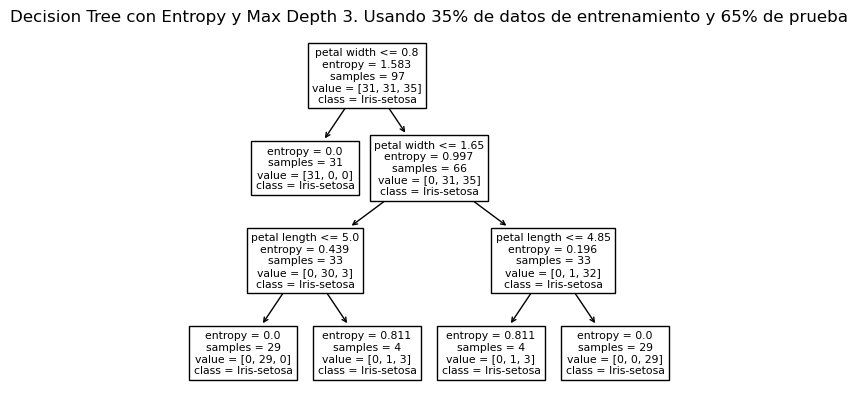

In [133]:
tree.plot_tree(myTree_entropy, feature_names=columns, class_names=y)
plt.title("Decision Tree con Entropy y Max Depth 3. Usando 35% de datos de entrenamiento y 65% de prueba")
plt.show()

In [134]:
# Accuracy de Decission Tree con entropy
myTree_entropy.score(X_test,y_test)

0.9622641509433962

Arbol con Entropy, max depth de 4, usando el 35% de datos de entrenamiento y 65% de prueba y random state de 25.

In [76]:
#Utilizamos train test split para poder separar los datos en 35% prueba, 65% entrenamiento y random state 1.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.35, random_state = 25)

In [77]:
#Cambiamos el max depth del decision tree classifier a 3 con criterion de entropy.
myTree_entropy1 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
myTree_entropy1.fit(X_train1, y_train1)
#Guardaremos los valores predict de X_test en y_pred
y_pred1 = myTree_entropy.predict(X_test1)

In [78]:
#imprimimos el decision tree con entropy y un max depth de 3.
print("\nDecision Tree con Entropy y Max Depth 3")
print(tree.export_text(myTree_entropy1))


Decision Tree con Entropy y Max Depth 3
|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- class: Iris-virginica



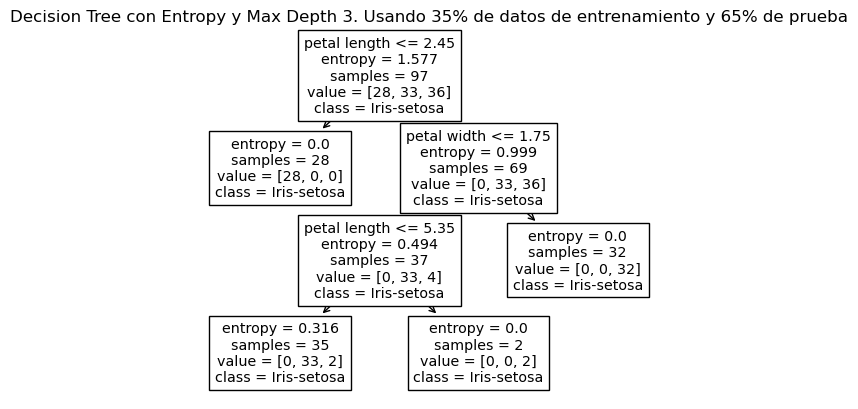

In [79]:
tree.plot_tree(myTree_entropy1, feature_names=columns, class_names=y)
plt.title("Decision Tree con Entropy y Max Depth 3. Usando 35% de datos de entrenamiento y 65% de prueba")
plt.show()

In [80]:
# Accuracy de decision tree con entropy, max depth 4, y random state de 25
myTree_entropy1.score(X_test1,y_pred1)

0.9811320754716981

# Evaluación de modelos

# Prueba 1

Evaluamos con el conjunto de prueba utilizando entropia, max depth de 3, y un random state de 1.

In [81]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test = myTree_entropy.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')  # Cambia 'binary' a 'weighted'

# Imprimir las métricas
print("Métricas en el conjunto de prueba:")
print("Accuracy:", accuracy_test)
print("Confusion Matrix:\n", confusion_matrix_test)
print("F1 Score:", f1_score_test)

Métricas en el conjunto de prueba:
Accuracy: 0.9622641509433962
Confusion Matrix:
 [[19  0  0]
 [ 0 18  1]
 [ 0  1 14]]
F1 Score: 0.9622641509433962


# Prueba 2

Evaluamos con el conjunto de prueba utilizando entropia, max depth de 4, y un random state de 25.

In [82]:
# Evaluar el modelo en el conjunto de prueba
y_pred_test1 = myTree_entropy1.predict(X_test1)
accuracy_test1 = accuracy_score(y_test1, y_pred1)
confusion_matrix_test1 = confusion_matrix(y_test1, y_pred1)
f1_score_test1 = f1_score(y_test1, y_pred1, average='weighted')  # Cambia 'binary' a 'weighted'

# Imprimir las métricas
print("Métricas en el conjunto de prueba con entropia, max depth de 4, y random state de 25:")
print("Accuracy:", accuracy_test1)
print("Confusion Matrix:\n", confusion_matrix_test1)
print("F1 Score:", f1_score_test1)

Métricas en el conjunto de prueba con entropia, max depth de 4, y random state de 25:
Accuracy: 0.9811320754716981
Confusion Matrix:
 [[22  0  0]
 [ 0 16  1]
 [ 0  0 14]]
F1 Score: 0.9811715068709214


# Validación

Decision Tree ahora con Train/Test/Validation

In [83]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

In [84]:
# Entrenar el modelo en el conjunto de entrenamiento
myTree_entropy.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Cargamos de sklearn el accuracy score, confusion matrix y f1 score

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [86]:
myTreeVal = tree.DecisionTreeClassifier(criterion="gini")

myTreeVal.fit(X_train2, y_train2)

y_predVal = myTreeVal.predict(X_temp2)

In [87]:
print(tree.export_text(myTreeVal))

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.60
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.60
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

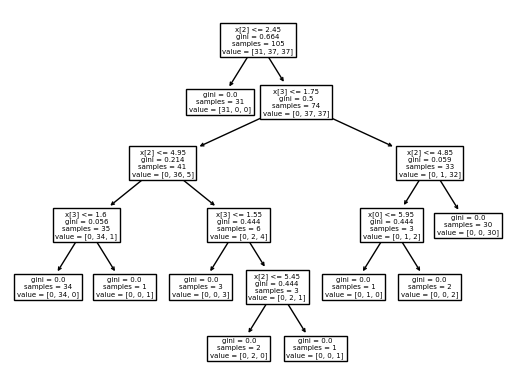

In [88]:
tree.plot_tree(myTreeVal)

In [89]:
# Evaluar el modelo en el conjunto de validación
y_pred_val2 = myTreeVal.predict(X_val2)
accuracy_val2 = accuracy_score(y_val2, y_pred_val2)
confusion_matrix_val2 = confusion_matrix(y_val2, y_pred_val2)
f1_score_val2 = f1_score(y_val2, y_pred_val2, average='weighted')  # Cambia 'binary' a 'weighted'

In [90]:
print("\nMétricas en el conjunto de validación:")
print("Accuracy:", accuracy_val2)
print("Confusion Matrix:\n", confusion_matrix_val2)
print("F1 Score:", f1_score_val2)


Métricas en el conjunto de validación:
Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0]
 [ 0 10  0]
 [ 0  0  7]]
F1 Score: 1.0


# Pruebas de Predicción

Ahora llevaremos a cabo 3 diferentes pruebas de los modelos con valores de prueba y con valores de validación.

In [91]:
# Realizar predicciones en datos diferentes a los de entrenamiento
prueba1 = [[5.1, 3.5, 1.4, 0.2]]
prueba2 = [[6.2, 2.9, 4.3, 1.3]] 
prueba3 = [[7.7, 3.0, 6.1, 2.3]] 

# Realizar predicciones para las muestras utilizando el modelo con criterio de entropy y max_depth 3
prediccion1Entropy = myTree_entropy.predict(prueba1)
prediccion2Entropy = myTree_entropy.predict(prueba2)
prediccion3Entropy = myTree_entropy.predict(prueba3)

# Realizar predicciones para las muestras utilizando el modelo con criterio de entropy y max_depth 4 y random state de 25.
prediccion1Entropy1 = myTree_entropy1.predict(prueba1)
prediccion2Entropy1 = myTree_entropy1.predict(prueba2)
prediccion3Entropy1 = myTree_entropy1.predict(prueba3)

# Realizar predicciones para las muestras utilizando el modelo de validacion
prediction1Val = myTreeVal.predict(prueba1)
prediction2Val = myTreeVal.predict(prueba2)
prediction3Val = myTreeVal.predict(prueba3)

# Imprimir las predicciones para el modelo con criterio de entropy y max_depth 3
print("\nPredicción con modelo de Entropy y Max Depth 3:")
print("Prueba 1:", prediccion1Entropy)
print("Prueba 2:", prediccion2Entropy)
print("Prueba 3:", prediccion3Entropy)

# Imprimir las predicciones para el modelo con criterio de entropyy max_depth 4 y random state de 25.
print("\nPredicción con modelo de Entropy y Max Depth 3:")
print("Prueba 1:", prediccion1Entropy1)
print("Prueba 2:", prediccion2Entropy1)
print("Prueba 3:", prediccion3Entropy1)

# Imprimir las predicciones con el modelo de validacion
print("\nPredicción con modelo validacion:")
print("Prueba 1:", prediction1Val)
print("Prueba 2:", prediction2Val)
print("Prueba 3:", prediction3Val)



Predicción con modelo de Entropy y Max Depth 3:
Prueba 1: ['Iris-setosa']
Prueba 2: ['Iris-versicolor']
Prueba 3: ['Iris-virginica']

Predicción con modelo de Entropy y Max Depth 3:
Prueba 1: ['Iris-setosa']
Prueba 2: ['Iris-versicolor']
Prueba 3: ['Iris-virginica']

Predicción con modelo validacion:
Prueba 1: ['Iris-setosa']
Prueba 2: ['Iris-versicolor']
Prueba 3: ['Iris-virginica']


c:\Users\anaca\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anaca\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anaca\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anaca\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anaca\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\anaca\anaconda3\Lib\site-packages\sklearn\base.py:4

In [92]:
# Realizar predicciones para el conjunto de prueba utilizando el modelo con criterio de entropy y max_depth 3
y_pred_entropy = myTree_entropy.predict(X_test)

# Realizar predicciones para el conjunto de prueba utilizando el modelo con criterio de entropy y max_depth 3
y_pred_entropy1 = myTree_entropy.predict(X_test1)

# Realizar predicciones para el conjunto de prueba utilizando el modelo valores de validacion
y_predVal = myTreeVal.predict(X_test)

# Comparar las predicciones con los valores reales del conjunto de prueba
print("\nComparación de predicciones con valores reales (Entropy y Max Depth 3):")
for i in range(10):
    print(f"Predicción: {y_pred_entropy[i]}, Valor Real: {y_test.iloc[i]}")


Comparación de predicciones con valores reales (Entropy y Max Depth 3):
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-versicolor, Valor Real: Iris-versicolor
Predicción: Iris-versicolor, Valor Real: Iris-versicolor
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-virginica, Valor Real: Iris-virginica
Predicción: Iris-versicolor, Valor Real: Iris-versicolor
Predicción: Iris-virginica, Valor Real: Iris-virginica
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-virginica, Valor Real: Iris-virginica


In [93]:
print("\nComparación de predicciones con valores reales (Entropy y Max Depth 4 y random state 25):")
for i in range(10):
    print(f"Predicción: {y_pred_entropy1[i]}, Valor Real: {y_test1.iloc[i]}")


Comparación de predicciones con valores reales (Entropy y Max Depth 4 y random state 25):
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-virginica, Valor Real: Iris-versicolor
Predicción: Iris-virginica, Valor Real: Iris-versicolor
Predicción: Iris-versicolor, Valor Real: Iris-versicolor
Predicción: Iris-virginica, Valor Real: Iris-virginica
Predicción: Iris-versicolor, Valor Real: Iris-versicolor
Predicción: Iris-virginica, Valor Real: Iris-virginica
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-versicolor, Valor Real: Iris-versicolor
Predicción: Iris-versicolor, Valor Real: Iris-versicolor


In [94]:
print("\nComparación de predicciones con valores de Validacion:")
for i in range(10):
    print(f"Predicción: {y_predVal[i]}, Valor Real: {y_test.iloc[i]}")


Comparación de predicciones con valores de Validacion:
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-versicolor, Valor Real: Iris-versicolor
Predicción: Iris-versicolor, Valor Real: Iris-versicolor
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-virginica, Valor Real: Iris-virginica
Predicción: Iris-versicolor, Valor Real: Iris-versicolor
Predicción: Iris-virginica, Valor Real: Iris-virginica
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-setosa, Valor Real: Iris-setosa
Predicción: Iris-virginica, Valor Real: Iris-virginica


# Varianza

In [99]:
# Cambiamos las etiquetas a numeros ya que la varianza requiere valores numéricos, y el dataset tiene strings como etiquetas.
class_to_number = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [102]:
# Aplicamos el cambio en las predicciones, para que ahora sean valores numericos
y_pred_entropyNum = [class_to_number[label] for label in y_pred_entropy]
y_pred_entropy1Num = [class_to_number[label] for label in y_pred_entropy1]
y_predValNum = [class_to_number[label] for label in y_predVal]

In [103]:
# Calculamos la varianza ahora que tenemos los valores de forma numérica
varianzaEntropy = np.var(y_pred_entropyNum)
varianzaEntropy1 = np.var(y_pred_entropy1Num)
varianzaVal = np.var(y_predValNum)

In [104]:
# Creamos una tabla para visualizar de una manera más clara la varianza de cada una de las pruebas.
variance_data = {
    'Modelo': ['Entropy y Max Depth 3', 'Entropy y Max Depth 4 (Random State 25)', 'Validación'],
    'Varianza': [varianzaEntropy, varianzaEntropy1, varianzaVal]
}

varianzaDF = pd.DataFrame(variance_data)
print(varianzaDF)


                                    Modelo  Varianza
0                    Entropy y Max Depth 3  0.657173
1  Entropy y Max Depth 4 (Random State 25)  0.726949
2                               Validación  0.635813


# Conclusiones
Primero llevamoa a cabos pruebas con arboles de decisión con distintos parámetros,
Primero:
* Criterio: entropía
* max_depth = 3
* random state = 1
En donde obtuvimos los siguientes resultados:
* Accuracy = 0.9622
* F1-Score = 0.9622
* Confusion Matrix = [[19  0  0] [ 0 18  1] [ 0  1 14]]

Segundo:
* Criterio = Entropía
* max_depth = 4
* random state = 25
En donde obtuvimos los siguientes resultados:
* Accuracy = 0.9811
* F1-Score = 0.9811
* Confusion Matrix = [[22  0  0] [ 0 16  1] [ 0  0 14]]

Tercero:
* Criterio = Gini
* random state = 42
En donde obtuvimos los siguientes resultados:
* Accuracy = 1
* F1-Score = 1
* Confusion Matrix = [[ 6  0  0] [ 0 10  0] [ 0  0  7]]


 
Como el mejor valor que se obtuvo de accuracy y de F1-Score es de 1, el sesgo del conjunto de validación es de Bajo Sesgo, el cual se define como que tiene un alto rendimiento o un buen ajuste a los datos y que el modelo está capturando las relaciones de los datos de manera correcta.

Por lo mismo que los valores que obtuvimos fueron de 1, la varianza es baja y no hay overfitting ni underfitting. Aunque en el caso de los datos de prueba, es posible mejorar el modelo si modificamos los parámetros. Ya vimos que al modificar los parámetros en la segunda prueba, obtuvimos una mejora de 2%, y con el conjunto de validación, pudimos obtener resultados de 100%.

Para la varianza de las 3 pruebas que llevamos a cabo obtuvimos los siguientes resultados.

* Entropy y Max Depth 3 = 0.657173
* Entropy y Max Depth 4 (Random State 25) = 0.726949
* Validación = 0.635813